# RADAR

## Radar Principles

### Signal Wave Parameters

$$\textrm{Wavelength  } \lambda = \dfrac{\textrm{speed of light} \left(\approx 3\cdot10^8 m/s\right)}{\textrm{frequency}} $$


$$ \textrm{frequency} = \dfrac{d\varphi}{dt} $$


$$ \varphi = \textrm{phase of signal} $$

### General Equation of a Wave

$$ y(t) = A cos(2\pi f_c t + \phi) $$

## FMCW: Frequency Modulated Continuous Wave

###  Chirp signal

| <img src="image5.png" alt="Drawing" style="width: 500px;"/> | 
|:--:| 
| *FMCW Waveform* |
|source: emagtech|

### Slope of Chirp

$$ Slope = \dfrac{B}{T_s} $$

* $B$ or $B_{sweep}$ is chirp frequency bandwidth
* $T_s$ is the chirp time.

## Radar Cross Section

| <img src="image13.png" alt="Drawing" style="width: 600px;"/> | 
|:--:| 
| *RCS of the target vehicle* |
|source: [https://arxiv.org/pdf/1607.02434.pdf](https://arxiv.org/pdf/1607.02434.pdf)|

### RCS Units
$$ RCS_{dB} = 10\ log \left(RCS_{m^2}\right) $$


## Radar Maximum Range Equation

$$ R_{max} = \left( \dfrac{P_s G^2 \lambda^2 \sigma}{P_{E_{min}} (4\pi)^3 } \right)^{\dfrac{1}{4}} $$

* $R$ - Maximum Range a radar can detect targets.
* $P_s$ - Transmitted Power from Radar (dBm)
* $G$ - Gain of the Transmit/Receive Antenna (dBi)
* $\lambda$ - Wavelength of the signal (mm)
* $\sigma$ - radar cross section ($m^2$)
* $P_E$ - Minimum received power radar can detect.

In [1]:
from math import pi

# Operating frequency (Hz)
fc = 77.0e9;

# Transmitted power (W)
Pt = 3e-3;

# Antenna Gain (linear)
G =  10000;

# Minimum Detectable Power
Ps = 1e-10;

# RCS of a car
RCS = 100;

# Speed of light
c = 3e8;


# TODO: Calculate the wavelength
wavelength = c/fc

# TODO : Measure the Maximum Range a Radar can see. 
R_max = pow( Pt * G * G * wavelength * wavelength * RCS / (Ps * pow(4*pi,3)) ,1.0/4.0)
print(R_max)

218.8709789680729


## Range, Velocity, and Angle Resolution

### Range Resolution

$$ d_{res} = \dfrac{c}{2B_{sweep}} $$

### Velocity Resolution

The velocity resolution is dependent on the number of chirps. As discussed for our case we selected to send 128 chirps. A higher number of chirps increases the velocity resolution, but it also takes longer to process the signal.

### Angle Resolution

Will be covered later???

## Range Estimation

$$ \textrm{Range} = \dfrac{c}{2} \cdot \tau $$

| <img src="range_estimation.png" alt="Drawing" style="width: 900px;"/> | 
|:--:| 
| *Range Estimation using FMCW* |
|source: [Delft University of Technology](https://www.slideshare.net/tobiasotto/principle-of-fmcw-radars)|

### Range

$$ R = \dfrac{c T_s f_b}{2B_{sweep}} $$

* $f_b$ beat frequency

$$ f_b = f_{\textrm{ramping}} - f_{\textrm{received}} $$

#### Range Estimation Exercise

calculate the range in meters of four targets with respective measured beat frequencies [0 MHz, 1.1 MHz, 13 MHz, 24 MHz]

* The radar maximum range = 300m
* The range resolution = 1m
* The speed of light c = 3*10^8

Note : The sweep time can be computed based on the time needed for the signal to travel the maximum range. In general, for an FMCW radar system, the sweep time should be at least 5 to 6 times the round trip time. This example uses a factor of 5.5

$ T_{chirp} = 5.5 \cdot 2 \cdot R_{max} /c $

In [2]:
# TODO : Find the B_sweep of chirp for 1 m resolution
c = 3e8
d_res = 1
B_sweep = c / 2.0 / d_res

# TODO : Calculate the chirp time based on the Radar's Max Range
max_range = 300
T_chirp = 5.5 * 2.0 * max_range / c

# TODO : define the frequency shifts 
f_shifts = [0, 1.1e6, 13e6, 24e6]

range_estimate = [f_shift * T_chirp * c / 2 / B_sweep for f_shift in f_shifts]

# Display the calculated range
print(range_estimate)

[0.0, 12.1, 143.0, 264.0]


## Doppler Estimation

| <img src="Basic-waveform-of-FMCW-radar.png" alt="Drawing" style="width: 600px;"/> | 
|:--:| 
| *Basic waveform of FMCW radar with Doppler Effect* |
|source: [https://www.researchgate.net/figure/Basic-waveform-of-FMCW-radar_fig2_327254486](https://www.researchgate.net/figure/Basic-waveform-of-FMCW-radar_fig2_327254486)|

$$ f_D = \dfrac{2v_r}{\lambda} $$

* $f_D$ shift in transmitted frequency
* $v_r$ relative velocity of the target
* $\lambda$ wavelength of the signal

why? If the path between a target and the radar is changed by an amount of $\Delta x$, the phase of the wave received by radar is shifted by:

$$ \Delta \varphi = \dfrac{\Delta x}{\lambda} $$
$$ \Delta \varphi = f \dfrac{\Delta x}{c} $$

the ovserved frequency would be 

$$ \Delta f = \dfrac{\Delta \varphi}{\Delta t} $$

where $ \Delta t $ is the time taken for the observation of the phase change

### Doppler Estimation Exercises

Complete the TODOs to calculate thevelocity in m/s of four targets with following doppler frequency shifts: [3 KHz, -4.5 KHz, 11 KHz, -3 KHz].

You can use the following parameter values:
* The radar's operating frequency = 77 GHz
* The speed of light c = 3*10^8

In [3]:
# Doppler Velocity Calculation
c = 3e8;            # speed of light
frequency = 77e9;   # frequency in Hz

# TODO : Calculate the wavelength
lamb = c / frequency


# TODO : Define the doppler shifts in Hz using the information from above 
f_ds = [3e3, -4.5e3, 11e3, -3e3]


# TODO : Calculate the velocity of the targets  fd = 2*vr/lambda
vr = [f_d * lamb / 2 for f_d in f_ds]

# TODO: Display results
print(vr)

[5.8441558441558445, -8.766233766233766, 21.428571428571427, -5.8441558441558445]


## FFT

| <img src="fft1.png" alt="Drawing" style="width: 600px;"/> | 
|:--:| 
| *FFT and FMCW* |
|source: Texas Instrument|

### Fast Fourier Transform Exercise

Use a Fourier transform to find the frequency components of a signal buried in noise. Specify the parameters of a signal with a sampling frequency of 1 kHz and a signal duration of 1.5 seconds.

In [4]:
import math
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline

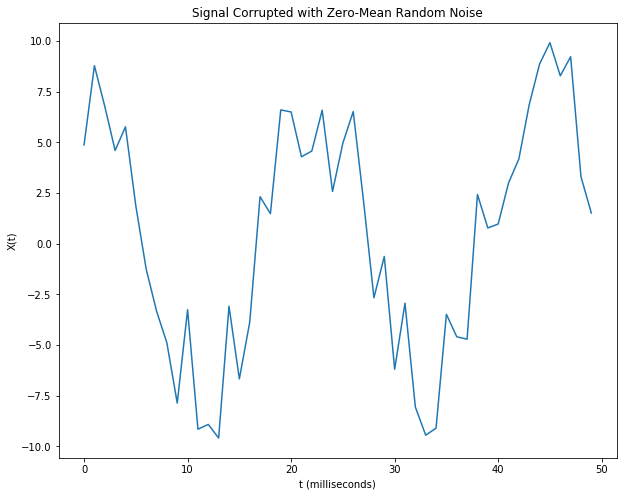

In [5]:
Fs = 1000 # Sampling frequency                    
T = 1/Fs # Sampling period       
L = 1500 # Length of signal
t = np.arange(L)*T # Time vector

# TODO: Form a signal containing a 77 Hz sinusoid of amplitude 0.7 and a 43Hz sinusoid of amplitude 2.
A = 7
f = 45 # Hz
S = A*np.cos(2*math.pi*f*t)

# Corrupt the signal with noise 
X = S + 2*np.random.randn(*t.shape);

# Plot the noisy signal in the time domain. It is difficult to identify the frequency components by looking at the signal X(t). 
fig, ax = plt.subplots()
fig.set_size_inches([10,8])
ax.plot(1000*t[:50], X[:50])
ax.set(xlabel='t (milliseconds)', ylabel='X(t)',
        title='Signal Corrupted with Zero-Mean Random Noise')
plt.show()

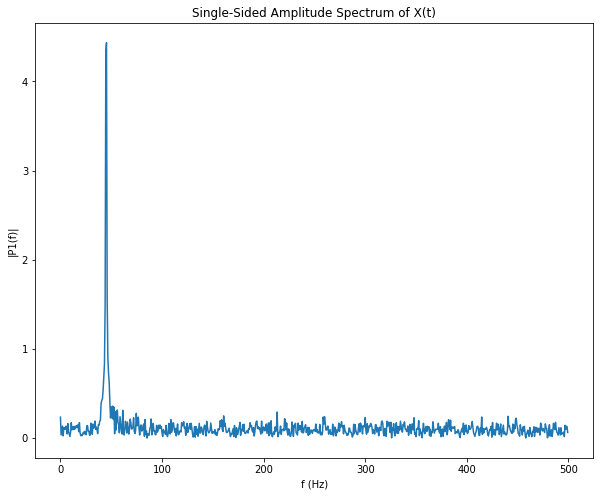

In [6]:
# TODO : Compute the Fourier transform of the signal.
signal_fft = np.fft.fft(X)
# print(signal_fft)
signal_fft = 2*np.abs(signal_fft/L);
# print(signal_fft)

# TODO : Compute the two-sided spectrum P2. 
# Then compute the single-sided spectrum P1 
# based on P2 and the even-valued signal length L.
signal_fft  = signal_fft[:int(L/2)]

# Plotting
f = Fs * np.arange(int(L/2))/L
fig, ax = plt.subplots()
fig.set_size_inches([10,8])
ax.plot(f, signal_fft)
ax.set(xlabel='f (Hz)', ylabel='|P1(f)|',
        title='Single-Sided Amplitude Spectrum of X(t)')
plt.show()

## 2D FFT

To calculate the velocity.

| <img src="2dfft.png" alt="Drawing" style="width: 900px;"/> | 
|:--:| 
| *2D FFT* |